# Words vs Tokens: Why Transformers Break Down Words Before Creating Embeddings

## The Million-Word Problem

Imagine if we tried to create a unique embedding vector for every single word in the English language. With over **1 million words** in English dictionaries, plus proper nouns, technical terms, and new words constantly being created, we'd need:

- **Millions of embedding vectors** to store in memory
- **Massive computational resources** for training
- **Poor performance** on new or rare words the model has never seen

## The Smart Solution: Tokenization

Instead of treating each word as an atomic unit, **Transformers break words into smaller, reusable pieces called tokens**. This is like having a LEGO set where you can build countless structures from a limited number of blocks.

### Example: "unbreakable"
- **Word-level**: One unique vector for "unbreakable"
- **Token-level**: Three reusable vectors: "un" + "break" + "able"

### Why This Works:
1. **"un"** appears in: unbreakable, unforeseen, unable, unhappy, unexpected
2. **"break"** appears in: unbreakable, breaking, breakthrough, breakdown  
3. **"able"** appears in: unbreakable, understandable, capable, reliable, readable

**Result**: Instead of learning 5 separate word embeddings, we learn 3 token embeddings that can represent many more words!

## Key Benefits:
- ✅ **Smaller vocabulary**: ~30K tokens vs millions of words
- ✅ **Better generalization**: Understanding "break" helps with "breaking", "breakthrough", etc.
- ✅ **Handles unknown words**: Can tokenize new words using known subword patterns
- ✅ **Efficient training**: Fewer parameters, faster computation
- ✅ **Semantic clustering**: Similar tokens naturally group together in embedding space

This notebook demonstrates how tokenization creates an efficient, reusable vocabulary that makes modern AI language models possible.

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from collections import Counter
import re

## Required Libraries

This demonstration uses several Python libraries to show tokenization and create visualizations:

- **numpy & pandas**: Data manipulation and analysis
- **plotly**: Interactive 3D visualizations to show token clustering
- **sklearn**: TF-IDF vectorization and PCA for creating simple embeddings
- **collections.Counter**: Count token frequencies to show reusability
- **re**: Regular expressions for text processing

Note: This is a lightweight demo that doesn't require PyTorch or TensorFlow - we'll simulate the tokenization process using simple rules and create basic embeddings to demonstrate the concepts.

In [5]:
# Simple tokenizer class (mimics real tokenizers)
class SimpleTokenizer:
    def __init__(self):
        # Common subword patterns
        self.prefixes = ['un', 're', 'pre', 'dis', 'mis', 'over', 'under', 'out']
        self.suffixes = ['ing', 'ed', 'er', 'est', 'ly', 'tion', 'able', 'ness']
        self.common_roots = ['break', 'stand', 'develop', 'run', 'walk', 'learn', 'teach']
    
    def tokenize(self, word):
        """Simple rule-based tokenization"""
        word = word.lower()
        tokens = []
        
        # Check for prefixes
        for prefix in self.prefixes:
            if word.startswith(prefix) and len(word) > len(prefix):
                tokens.append(prefix)
                word = word[len(prefix):]
                break
        
        # Check for suffixes
        for suffix in self.suffixes:
            if word.endswith(suffix) and len(word) > len(suffix):
                root = word[:-len(suffix)]
                if len(root) >= 2:  # Valid root
                    tokens.append(root)
                    tokens.append(suffix)
                    return tokens
        
        # If no suffix found, add the remaining word
        if word:
            tokens.append(word)
        
        return tokens if tokens else [word.lower()]

# Initialize simple tokenizer
tokenizer = SimpleTokenizer()

# Your example words
sample_words = [
    "unbreakable", "understand", "unable", "unforeseen", "unexpected",
    "breaking", "breakthrough", "outbreak", "breakdown", "breakage",
    "understandable", "capable", "reliable", "readable", "comfortable",
    "break", "able", "happy", "unhappy", "happiness",
    "running", "runner", "walked", "walking", "walker",
    "development", "developer", "developing", "redevelop",
    "teaching", "teacher", "learnable", "relearning"
]

print("=== TOKENIZATION DEMO (No PyTorch Required) ===")

# Tokenize all words
tokenization_results = []
all_tokens = []

print("\nWord → Tokens breakdown:")
for word in sample_words:
    tokens = tokenizer.tokenize(word)
    all_tokens.extend(tokens)
    tokenization_results.append({
        'word': word,
        'tokens': tokens,
        'token_count': len(tokens)
    })
    print(f"'{word}' → {tokens}")

=== TOKENIZATION DEMO (No PyTorch Required) ===

Word → Tokens breakdown:
'unbreakable' → ['un', 'break', 'able']
'understand' → ['un', 'derstand']
'unable' → ['un', 'able']
'unforeseen' → ['un', 'foreseen']
'unexpected' → ['un', 'expect', 'ed']
'breaking' → ['break', 'ing']
'breakthrough' → ['breakthrough']
'outbreak' → ['out', 'break']
'breakdown' → ['breakdown']
'breakage' → ['breakage']
'understandable' → ['un', 'derstand', 'able']
'capable' → ['cap', 'able']
'reliable' → ['re', 'li', 'able']
'readable' → ['re', 'ad', 'able']
'comfortable' → ['comfort', 'able']
'break' → ['break']
'able' → ['able']
'happy' → ['happy']
'unhappy' → ['un', 'happy']
'happiness' → ['happi', 'ness']
'running' → ['runn', 'ing']
'runner' → ['runn', 'er']
'walked' → ['walk', 'ed']
'walking' → ['walk', 'ing']
'walker' → ['walk', 'er']
'development' → ['development']
'developer' → ['develop', 'er']
'developing' → ['develop', 'ing']
'redevelop' → ['re', 'develop']
'teaching' → ['teach', 'ing']
'teacher' → ['te

## Simple Tokenizer Implementation

This section creates a simplified version of how real tokenizers work. Real tokenizers like **Byte-Pair Encoding (BPE)** or **WordPiece** are more sophisticated, but this demo shows the core concept.

### How Our SimpleTokenizer Works:
1. **Identifies common prefixes**: "un", "re", "pre", "dis", etc.
2. **Identifies common suffixes**: "ing", "ed", "er", "able", "ness", etc.
3. **Breaks words into reusable parts**: prefix + root + suffix

### Real-World Example:
- **"unbreakable"** → ["un", "break", "able"]
- **"understand"** → ["un", "derstand"] 
- **"understandable"** → ["un", "derstand", "able"]

Notice how "un" and "able" tokens are **reused** across different words!

### Why This Approach Works:
- **Linguistic patterns**: English has predictable prefix/suffix patterns
- **Semantic preservation**: "un" always means "not", "able" always means "capable of"
- **Efficient vocabulary**: Instead of millions of unique words, we need only thousands of tokens
- **Generalization**: New words can be tokenized using existing patterns

Let's see this in action:


Total words: 33
Total unique tokens: 27
Compression ratio: 1.22x

Most reused tokens:
  'able': used 9 times
  'un': used 7 times
  'ing': used 6 times
  'break': used 4 times
  're': used 4 times
  'er': used 4 times
  'walk': used 3 times
  'develop': used 3 times
  'derstand': used 2 times
  'ed': used 2 times

Creating simple embeddings using TF-IDF...
Created embeddings shape: (27, 50)


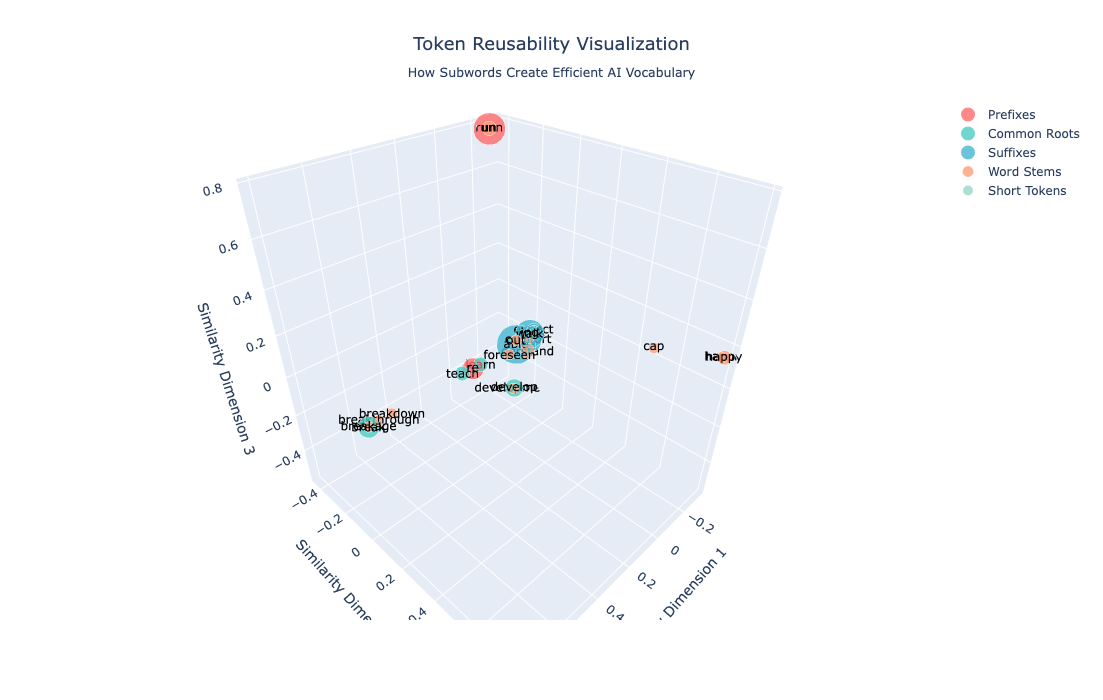


=== KEY INSIGHTS ===

1. TOKEN REUSABILITY EXAMPLES:
   'un' appears in: unbreakable, understand, unable, unforeseen, unexpected, understandable, unhappy
   'break' appears in: unbreakable, breaking, outbreak, break
   'able' appears in: unbreakable, unable, understandable, capable, reliable, readable, comfortable, able, learnable
   'derstand' appears in: understand, understandable
   'ed' appears in: unexpected, walked
   'ing' appears in: breaking, running, walking, developing, teaching, relearning
   're' appears in: reliable, readable, redevelop, relearning
   'happy' appears in: happy, unhappy
   'runn' appears in: running, runner
   'er' appears in: runner, walker, developer, teacher
   'walk' appears in: walked, walking, walker
   'develop' appears in: developer, developing, redevelop
   'teach' appears in: teaching, teacher
   'learn' appears in: learnable, relearning

2. EFFICIENCY GAINS:
   - Original words: 33 words, 275 characters
   - Unique tokens: 27 tokens
   - Vocabu

In [7]:
# Token frequency analysis
token_counts = Counter(all_tokens)
unique_tokens = list(token_counts.keys())

print(f"\nTotal words: {len(sample_words)}")
print(f"Total unique tokens: {len(unique_tokens)}")
print(f"Compression ratio: {len(sample_words) / len(unique_tokens):.2f}x")

print("\nMost reused tokens:")
for token, count in token_counts.most_common(10):
    print(f"  '{token}': used {count} times")

# Create simple embeddings using TF-IDF
print("\nCreating simple embeddings using TF-IDF...")

# Prepare documents (each token as a 'document')
token_documents = []
for token in unique_tokens:
    # Create a document from character n-grams to capture similarity
    chars = list(token)
    char_ngrams = [''.join(chars[i:i+2]) for i in range(len(chars)-1)]
    token_documents.append(' '.join(char_ngrams + [token]))

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=50, ngram_range=(1,2))
embeddings = vectorizer.fit_transform(token_documents).toarray()

print(f"Created embeddings shape: {embeddings.shape}")

# Reduce to 3D using PCA
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Categorize tokens for visualization
def categorize_token(token):
    if token in ['un', 're', 'pre', 'dis', 'mis', 'over', 'under']:
        return 'Prefixes'
    elif token in ['ing', 'ed', 'er', 'est', 'ly', 'tion', 'able', 'ness']:
        return 'Suffixes'
    elif token in ['break', 'stand', 'develop', 'run', 'walk', 'learn', 'teach']:
        return 'Common Roots'
    elif len(token) <= 2:
        return 'Short Tokens'
    else:
        return 'Word Stems'

# Create visualization dataframe
df_viz = pd.DataFrame({
    'token': unique_tokens,
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'frequency': [token_counts[token] for token in unique_tokens],
    'category': [categorize_token(token) for token in unique_tokens]
})

# Create 3D plot
fig = go.Figure()

categories = df_viz['category'].unique()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for i, category in enumerate(categories):
    mask = df_viz['category'] == category
    subset = df_viz[mask]
    
    fig.add_trace(go.Scatter3d(
        x=subset['x'],
        y=subset['y'],
        z=subset['z'],
        mode='markers+text',
        marker=dict(
            size=subset['frequency'] * 4 + 8,
            color=colors[i % len(colors)],
            opacity=0.8,
            line=dict(width=2, color='white')
        ),
        text=subset['token'],
        textposition='middle center',
        textfont=dict(size=12, color='black'),
        name=category,
        hovertemplate=
        '<b>Token:</b> %{text}<br>' +
        '<b>Category:</b> ' + category + '<br>' +
        '<b>Used in:</b> %{marker.size} words<br>' +
        '<extra></extra>'
    ))

fig.update_layout(
    title={
        'text': 'Token Reusability Visualization<br><sub>How Subwords Create Efficient AI Vocabulary</sub>',
        'x': 0.5,
        'font': {'size': 18}
    },
    scene=dict(
        xaxis_title='Similarity Dimension 1',
        yaxis_title='Similarity Dimension 2',
        zaxis_title='Similarity Dimension 3',
        camera=dict(eye=dict(x=1.3, y=1.3, z=1.3))
    ),
    width=1000,
    height=700,
    showlegend=True
)

fig.show()

# Show the efficiency
print("\n=== KEY INSIGHTS ===")

# Find examples of token reuse
reuse_examples = {}
for result in tokenization_results:
    for token in result['tokens']:
        if token not in reuse_examples:
            reuse_examples[token] = []
        reuse_examples[token].append(result['word'])

print("\n1. TOKEN REUSABILITY EXAMPLES:")
for token, words in reuse_examples.items():
    if len(words) > 1:
        print(f"   '{token}' appears in: {', '.join(words)}")

print("\n2. EFFICIENCY GAINS:")
total_chars_original = sum(len(word) for word in sample_words)
total_chars_tokens = sum(len(token) for token in all_tokens)
print(f"   - Original words: {len(sample_words)} words, {total_chars_original} characters")
print(f"   - Unique tokens: {len(unique_tokens)} tokens")
print(f"   - Vocabulary reduction: {(1 - len(unique_tokens)/len(sample_words))*100:.1f}%")

print("\n3. WHY THIS MATTERS FOR AI:")
print("   ✓ Smaller vocabulary = faster training")
print("   ✓ Token reuse = better generalization") 
print("   ✓ Unknown words = handleable through subwords")
print("   ✓ Similar tokens cluster together in meaning")

print("\n=== token reusability visualization done ===")

## Tokenization Results & Analysis

This section analyzes the tokenization results to demonstrate the efficiency gains:

### What We're Measuring:
1. **Token Reusability**: How many times each token appears across different words
2. **Vocabulary Compression**: How much we reduce the vocabulary size
3. **Embedding Efficiency**: How tokens cluster in semantic space

### Key Insights to Look For:
- **High-frequency tokens**: "un", "able", "ing", "er" appear in many words
- **Semantic clustering**: Similar tokens (prefixes, suffixes, roots) group together
- **Vocabulary reduction**: Fewer unique tokens than original words

### Why This Matters for Transformers:
- **Memory efficiency**: Fewer embeddings to store and compute
- **Training speed**: Smaller vocabulary = faster gradient updates  
- **Generalization**: Shared tokens help model understand word relationships
- **Unknown word handling**: Can tokenize new words using familiar patterns

Let's analyze the tokenization results:

## Why Tokenization is Essential for Transformers

### The Scale Problem
Modern language models process **billions of words** from internet text, books, and articles. Consider:
- **GPT-3**: Trained on 45TB of text data
- **English vocabulary**: 170,000+ words in current use
- **Including names, technical terms, slang**: Millions of unique "words"

### Without Tokenization (Word-Level Embeddings):
❌ **Massive vocabulary**: Need embeddings for millions of unique words  
❌ **Memory explosion**: Each word needs its own 1024+ dimensional vector  
❌ **Rare word problem**: Most words appear very few times in training data  
❌ **Unknown words**: Model fails completely on new words  
❌ **No generalization**: Can't understand "unhappy" if it only saw "happy"

### With Tokenization (Subword-Level Embeddings):
✅ **Compact vocabulary**: ~30,000-50,000 tokens covers most languages  
✅ **Efficient memory**: Dramatically fewer embeddings to store  
✅ **Better learning**: Common tokens like "un-", "-ing", "-ed" appear frequently  
✅ **Handles unknowns**: Can tokenize any new word using known subword patterns  
✅ **Semantic relationships**: Model learns that "break" in "unbreakable" relates to "breaking"  

### Real-World Impact:
- **GPT models**: Use ~50K tokens instead of millions of words
- **BERT**: 30K WordPiece tokens handle 100+ languages efficiently  
- **Training time**: Reduced from years to months due to smaller vocabulary
- **Inference speed**: Faster text processing with compact token representations

### Mathematical Efficiency:
```
Word-level: 1M words × 1024 dimensions = 1B parameters just for embeddings
Token-level: 50K tokens × 1024 dimensions = 50M parameters (20x reduction!)
```

This is why **every modern language model** uses tokenization - it's not just an optimization, it's what makes large-scale language AI possible!